# Monte Carlo Integration

Consider the function,
\begin{eqnarray}
  h(x) = [ \cos(50x) + \sin(20x) ]^2 \nonumber
\end{eqnarray}

The integral,
\begin{eqnarray}
  \int^1_0 h(x) dx \nonumber
\end{eqnarray}
can be calculated by generating
\begin{eqnarray}
   U_1, U_2, \ldots, U_n  \sim  iid \quad U(0,1)
\end{eqnarray}
random variables, and approximate $\int h(x) dx$ with
\begin{eqnarray}
   \sum^n_{i=1} h(U_i)/n
\end{eqnarray}

In [4]:
using Plots

nsim = 10000
u = rand(nsim)
den = 1:nsim

# The function to be integrated
mci_ex(x) = (cos(50*x) + sin(20*x))^2

# The Monte Carlo sum
## Generated Values of Function
hint = mci_ex.(u)
## Mean
hplot = cumsum(hint) ./ den
## Standard Errors
stdh = sqrt.( cumsum(hint.^2) ./ den .- (hplot).^2);
upper = hplot .+ stdh ./ sqrt.(den);
lower = hplot .- stdh ./ sqrt.(den);


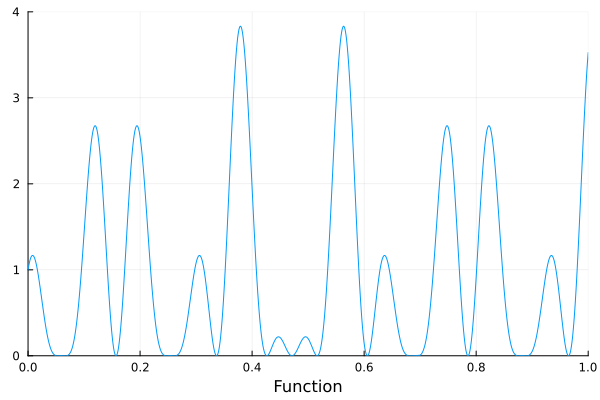

In [5]:
# Plotting the function
plot(mci_ex, xlim=(0,1), ylim=(0,4), xlabel="Function", ylabel="", label="")


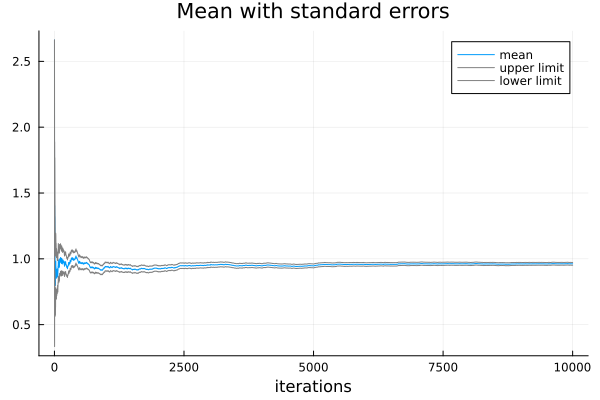

In [21]:
plot(hplot, title = "Mean with standard errors", xlabel = "iterations", label = "mean")
plot!(upper, label = "upper limit", color = "grey")
plot!(lower, label = "lower limit", color = "grey")